In [37]:
import numpy as np
import torch

In [38]:
inputs = np.array([[73,67,43],
                   [91,88,64],
                   [87,134,58],
                   [102,43,37],
                   [69,96,70]],dtype='float32')

In [39]:
targets = np.array([[56],
                    [81],
                    [119],
                    [22],
                    [103]],dtype='float32')

In [40]:
 # Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
print(inputs)
targets = torch.from_numpy(targets)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [41]:
 # Weights and biases
w = torch.randn(1,3,requires_grad =True)
print(w)
b = torch.randn(1,requires_grad=True)
print(b)

tensor([[ 0.9755,  0.4957, -0.5646]], requires_grad=True)
tensor([-1.4020], requires_grad=True)


In [42]:
# Define the model
def model(x):
  return torch.mm(x,w.t(),out=None) +b

In [43]:
# Generate predictions
# Compare with targets

preds = model(inputs)
print("Prediction :",preds)
print("Targets :",targets)

Prediction : tensor([[ 78.7419],
        [ 94.8538],
        [117.1413],
        [ 98.5214],
        [ 73.9715]], grad_fn=<AddBackward0>)
Targets : tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [44]:
# MSE loss
# Compute loss
def mse(P,T):
  diff = 0
  i=0
  sum=0
  n=len(T)
  for k in range(0,n):
    i+=1
    diff = T[k] - P[k]
    square = diff*diff
    sum+=square
  mean = sum/i
  return mean

output = mse(preds,targets)
print("Loss :",output)

Loss : tensor([1482.1497], grad_fn=<DivBackward0>)


In [45]:
# Compute gradients
print("Gradient :",output.backward())

Gradient : None


In [46]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[ 0.9755,  0.4957, -0.5646]], requires_grad=True)
tensor([[3424.5437, 1198.9836, 1022.4142]])


In [47]:
# Gradients for bias
print(b)
print(b.grad)

tensor([-1.4020], requires_grad=True)
tensor([32.8919])


In [48]:
# Compute gradients
with torch.no_grad():
  w-=w.grad*1e-5
  b-=b.grad*1e-5
  w.grad.zero_()
  b.grad.zero_()
print(w)
print(b)

tensor([[ 0.9412,  0.4837, -0.5748]], requires_grad=True)
tensor([-1.4024], requires_grad=True)


In [49]:
# Generate predictions
# Calculate the loss
new_preds = model(inputs)
new_loss = mse(new_preds,targets)
print("New Loss :",new_loss)

New Loss : tensor([1360.2891], grad_fn=<DivBackward0>)


In [50]:
# Train for 1000 epochs
for i in range(1000):
  preds = model(inputs)
  loss = mse(preds,targets)
  loss.backward()
  with torch.no_grad():
    w-=w.grad * 1e-5
    b-=b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [51]:
# Calculate loss
preds = model(inputs)
loss = mse(preds,targets)
print(loss)

tensor([4.7993], grad_fn=<DivBackward0>)


Pytorch_Built_Ins

In [52]:
 # Imports
import torch.nn as nn
print(inputs)
print(targets)


tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [53]:
def model1(x):
  return x @ w.t() +b

In [54]:
preds = model(inputs)
print("Prediction :",preds)
print("Targets :",targets)

Prediction : tensor([[ 57.0946],
        [ 80.9710],
        [121.6130],
        [ 21.9186],
        [ 99.0046]], grad_fn=<AddBackward0>)
Targets : tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [55]:
loss = nn.MSELoss()
output = loss(preds,targets)
output.backward()
print("Loss :",output)

Loss : tensor(4.7993, grad_fn=<MseLossBackward0>)


In [56]:
print(w)
print(w.grad)
print(b)
print(b.grad)

tensor([[-0.3453,  0.9204,  0.5125]], requires_grad=True)
tensor([[  8.2412,  13.5441, -34.3720]])
tensor([-1.4053], requires_grad=True)
tensor([-0.1593])


In [57]:

for i in range(1000):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [58]:
preds = model1(inputs)
loss = mse(preds,targets)
 
print(loss)
b
w

tensor([1.0530], grad_fn=<DivBackward0>)


tensor([[-0.3826,  0.8590,  0.6683]], requires_grad=True)

In [62]:
l1=[]
for i in range(1000):
    preds = model(inputs)
    loss = mse(preds, targets)
    l1.append(loss.cpu().detach().numpy())
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()
     

In [63]:
import matplotlib.pyplot as plt
type(l1)

list

In [64]:
l2=np.array(range(0,1000))
l2

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

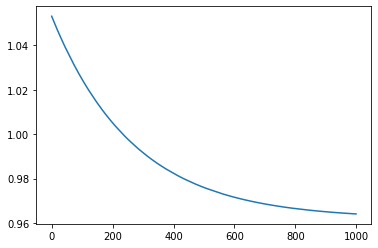

In [65]:
l1=np.array(l1)
plt.plot(l2,l1)


In [66]:
import torch.nn as nn


In [67]:
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], 
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119], [56, 70], 
                    [81, 101], [119, 133], [22, 37], 
                    [103, 119], [56, 70], [81, 101], 
                    [119, 133], [22, 37], [103, 119]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
     

In [68]:
from torch.utils.data import TensorDataset
train_ds = TensorDataset(inputs, targets)


In [69]:
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)
     

Parameter containing:
tensor([[-0.1794, -0.2903, -0.1216],
        [-0.3002, -0.4826, -0.3048]], requires_grad=True)
Parameter containing:
tensor([0.1364, 0.1032], requires_grad=True)


In [70]:
list(model.parameters())


[Parameter containing:
 tensor([[-0.1794, -0.2903, -0.1216],
         [-0.3002, -0.4826, -0.3048]], requires_grad=True),
 Parameter containing:
 tensor([0.1364, 0.1032], requires_grad=True)]

In [71]:
preds = model(inputs)
preds

tensor([[ -37.6421,  -67.2520],
        [ -49.5221,  -89.1907],
        [ -61.4282, -108.3593],
        [ -35.1495,  -62.5485],
        [ -48.6262,  -88.2747],
        [ -37.6421,  -67.2520],
        [ -49.5221,  -89.1907],
        [ -61.4282, -108.3593],
        [ -35.1495,  -62.5485],
        [ -48.6262,  -88.2747],
        [ -37.6421,  -67.2520],
        [ -49.5221,  -89.1907],
        [ -61.4282, -108.3593],
        [ -35.1495,  -62.5485],
        [ -48.6262,  -88.2747]], grad_fn=<AddmmBackward0>)

In [72]:
import torch.nn.functional as F
loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(25075.3379, grad_fn=<MseLossBackward0>)


In [73]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [76]:
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
     

